✅ Data Preview:
  TransactionID CustomerID TransactionDate ProductID  Quantity  UnitPrice  \
0    TRX50000_0   CUST1302      2022-01-12  Prod_107         3      53.74   
1    TRX50000_1   CUST1302      2022-01-12  Prod_104         2      43.15   
2    TRX50000_2   CUST1302      2022-01-12  Prod_107         1      59.80   
3    TRX50001_0   CUST1267      2023-10-17  Prod_108         1     214.31   
4    TRX50001_1   CUST1267      2023-10-17  Prod_109         3     312.02   

   TotalPrice  
0      161.22  
1       86.30  
2       59.80  
3      214.31  
4      936.06  

✅ Data Types:
TransactionID              object
CustomerID                 object
TransactionDate    datetime64[ns]
ProductID                  object
Quantity                    int64
UnitPrice                 float64
TotalPrice                float64
dtype: object

✅ Missing Values:
TransactionID      0
CustomerID         0
TransactionDate    0
ProductID          0
Quantity           0
UnitPrice          0
TotalPrice   

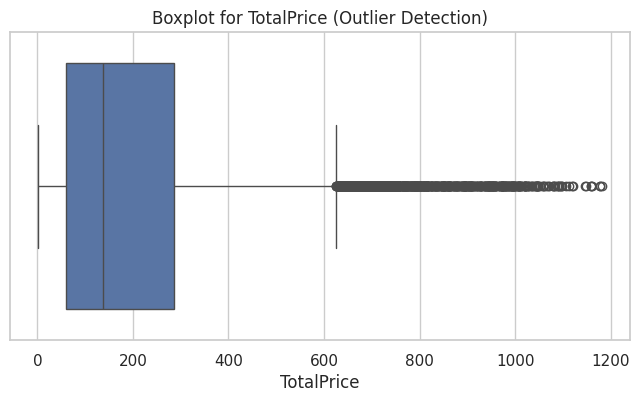

In [1]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display all columns and set plot styles
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Step 2: Load the mock data (if using existing code)
from datetime import datetime, timedelta

# Data generation (from your mock setup)
np.random.seed(42)

num_transactions = 5000
num_customers = 500
products = [f'Prod_{100+i}' for i in range(20)]
start_date = datetime(2022, 1, 1)
end_date = datetime(2023, 12, 31)
date_range_days = (end_date - start_date).days

transaction_data = []

customer_profiles = {
    f'CUST{1000+i}': {
        'avg_spend': np.random.uniform(10, 200),
        'frequency_factor': np.random.uniform(0.1, 1)
    }
    for i in range(num_customers)
}

for i in range(num_transactions):
    customer_id = f'CUST{1000 + np.random.randint(0, num_customers)}'
    transaction_date = start_date + timedelta(days=np.random.randint(0, date_range_days))
    num_items_in_transaction = np.random.randint(1, 6)

    for _ in range(num_items_in_transaction):
        product_id = np.random.choice(products)
        quantity = np.random.randint(1, 4)
        unit_price = np.random.uniform(5, 100) * (customer_profiles[customer_id]['avg_spend'] / 50)
        unit_price = round(max(1.0, unit_price), 2)

        transaction_data.append({
            'TransactionID': f'TRX{50000+i}_{_}',
            'CustomerID': customer_id,
            'TransactionDate': transaction_date.strftime('%Y-%m-%d'),
            'ProductID': product_id,
            'Quantity': quantity,
            'UnitPrice': unit_price
        })

df = pd.DataFrame(transaction_data)

# Step 3: Create TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Step 4: Convert TransactionDate to datetime format
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# Step 5: View basic info
print("✅ Data Preview:")
print(df.head())

print("\n✅ Data Types:")
print(df.dtypes)

# Step 6: Check for missing values
print("\n✅ Missing Values:")
print(df.isnull().sum())

# Step 7: Outlier check for 'TotalPrice'
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['TotalPrice'])
plt.title("Boxplot for TotalPrice (Outlier Detection)")
plt.show()


In [2]:
# Step 2: RFM Analysis

# Step 2.1: Define the snapshot date (reference date to calculate recency)
snapshot_date = df['TransactionDate'].max() + pd.Timedelta(days=1)
print("📆 Snapshot Date:", snapshot_date.date())

# Step 2.2: Group by CustomerID and calculate RFM metrics
rfm = df.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (snapshot_date - x.max()).days,   # Recency
    'TransactionID': 'nunique',                                     # Frequency (count of transactions)
    'TotalPrice': 'sum'                                             # Monetary Value (total spend)
}).reset_index()

# Step 2.3: Rename the columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'MonetaryValue']

# Step 2.4: Preview the RFM table
print("\n✅ RFM Table (Top 10 Rows):")
print(rfm.head(10))

# Optional: Summary statistics
print("\n📊 RFM Summary Stats:")
print(rfm.describe())


📆 Snapshot Date: 2023-12-31

✅ RFM Table (Top 10 Rows):
  CustomerID  Recency  Frequency  MonetaryValue
0   CUST1000        9         41        6855.79
1   CUST1001       49         10        2856.43
2   CUST1002        7         25        2175.73
3   CUST1003       22         33        1085.57
4   CUST1004      134         27        6887.81
5   CUST1005       20         36        1112.01
6   CUST1006       13         38       14374.53
7   CUST1007      167         38        3812.45
8   CUST1008       18         25        3374.25
9   CUST1009       31         35        5916.71

📊 RFM Summary Stats:
          Recency   Frequency  MonetaryValue
count  500.000000  500.000000       500.0000
mean    71.310000   30.286000      6279.1636
std     65.035075   10.224543      4430.0027
min      1.000000    4.000000       377.0000
25%     22.000000   23.000000      2579.4425
50%     54.000000   30.000000      5292.9750
75%    105.250000   37.000000      9319.3500
max    500.000000   57.000000     

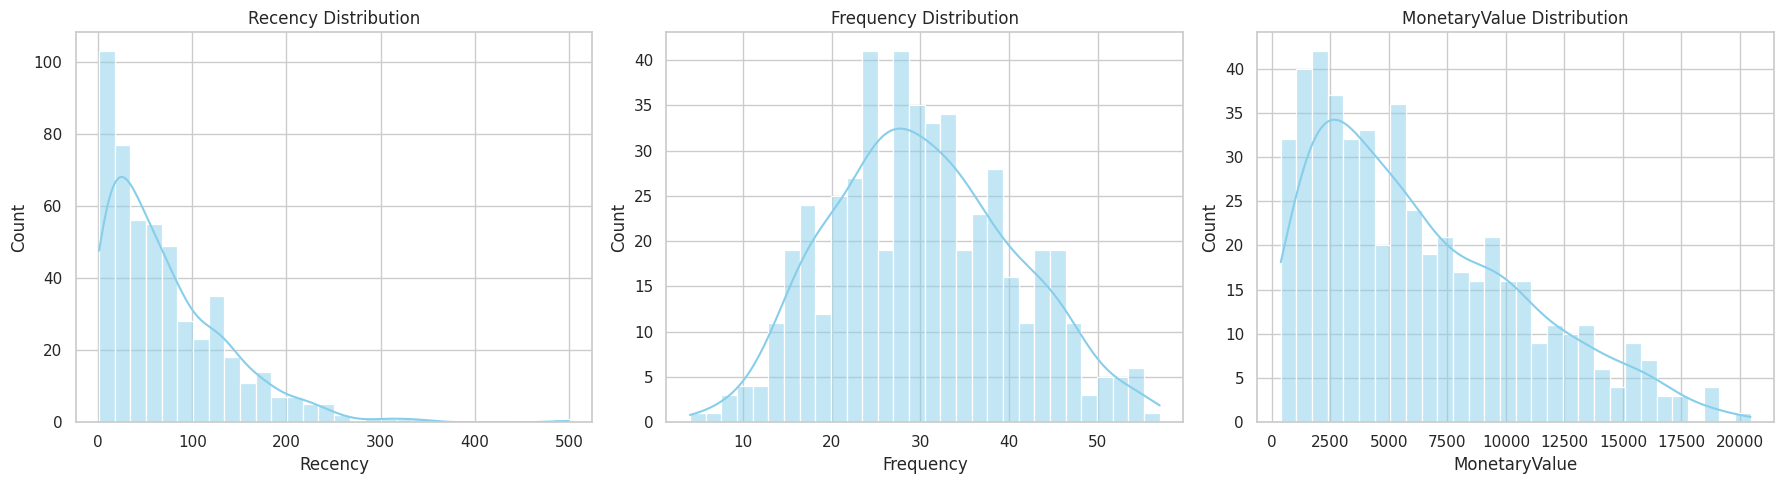

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style='whitegrid')

# Plot distributions
plt.figure(figsize=(18, 5))

for i, column in enumerate(['Recency', 'Frequency', 'MonetaryValue']):
    plt.subplot(1, 3, i+1)
    sns.histplot(rfm[column], kde=True, bins=30, color='skyblue')
    plt.title(f'{column} Distribution')

plt.tight_layout()
plt.show()


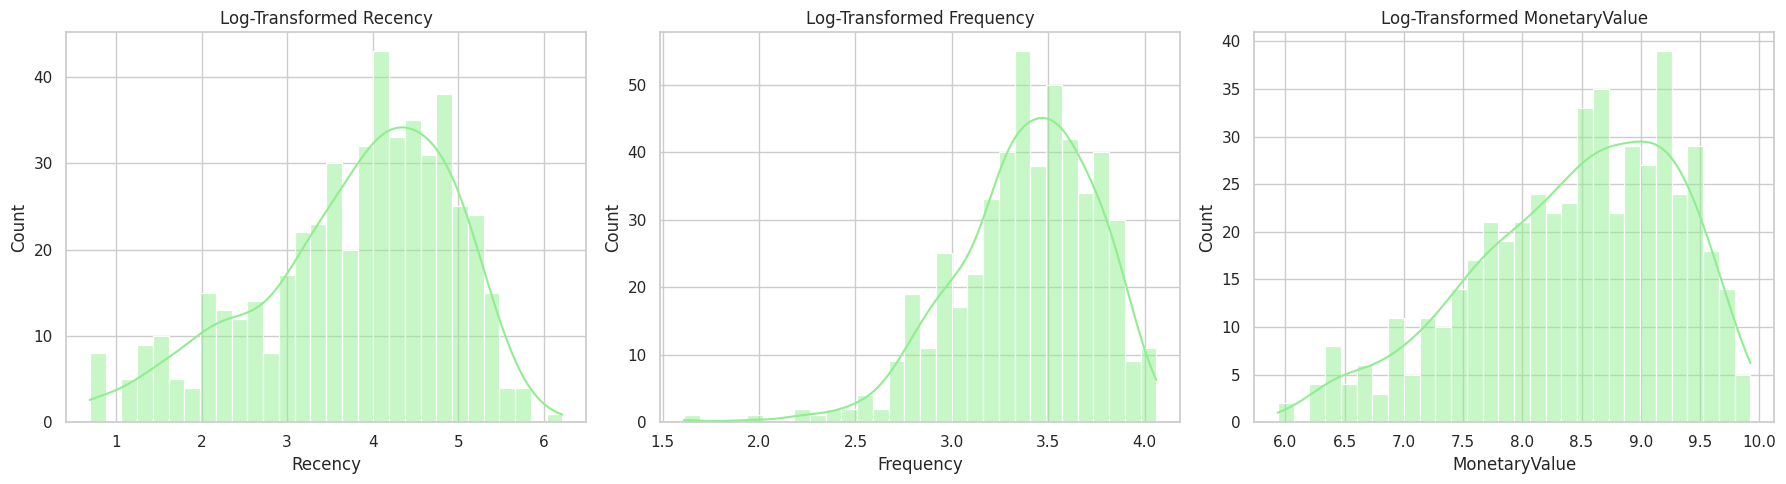

In [4]:
import numpy as np

# Apply log transformation
rfm_log = rfm.copy()
rfm_log['Recency'] = np.log1p(rfm_log['Recency'])
rfm_log['Frequency'] = np.log1p(rfm_log['Frequency'])
rfm_log['MonetaryValue'] = np.log1p(rfm_log['MonetaryValue'])

# Optional: Check new distribution
plt.figure(figsize=(18, 5))
for i, column in enumerate(['Recency', 'Frequency', 'MonetaryValue']):
    plt.subplot(1, 3, i+1)
    sns.histplot(rfm_log[column], kde=True, bins=30, color='lightgreen')
    plt.title(f'Log-Transformed {column}')
plt.tight_layout()
plt.show()


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log[['Recency', 'Frequency', 'MonetaryValue']])

# Convert to DataFrame
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'MonetaryValue'])

# Preview
print("✅ Scaled RFM Data (Top 5 Rows):")
print(rfm_scaled_df.head())


✅ Scaled RFM Data (Top 5 Rows):
    Recency  Frequency  MonetaryValue
0 -1.311601   0.980667       0.458701
1  0.107585  -2.729292      -0.562686
2 -1.508367  -0.347315      -0.880192
3 -0.577150   0.395533      -1.690935
4  0.983425  -0.142103       0.464138


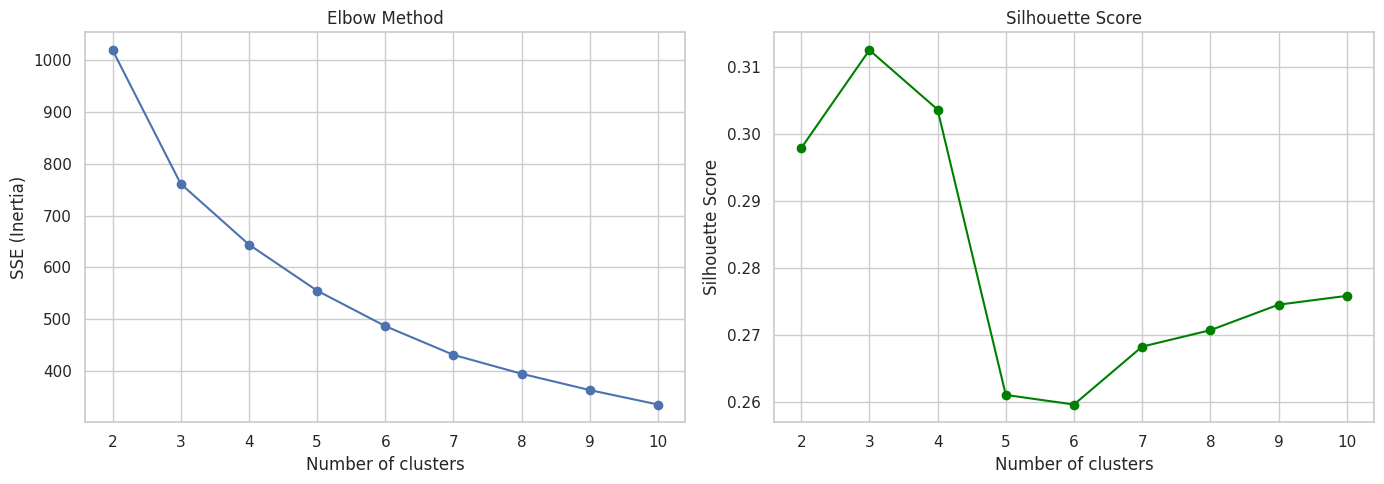

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Elbow method
sse = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled_df)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(rfm_scaled_df, kmeans.labels_))

# Plotting Elbow and Silhouette Score
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Inertia)')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


In [7]:
# Apply KMeans
optimal_k = 4  # change if your elbow/silhouette suggests another number
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
rfm_scaled_df['Cluster'] = kmeans.fit_predict(rfm_scaled_df)

# Join cluster labels back to original RFM table
rfm['Cluster'] = rfm_scaled_df['Cluster']

# View clustered RFM data
print("✅ RFM with Cluster Labels (Top 10 Rows):")
print(rfm.head(10))


✅ RFM with Cluster Labels (Top 10 Rows):
  CustomerID  Recency  Frequency  MonetaryValue  Cluster
0   CUST1000        9         41        6855.79        2
1   CUST1001       49         10        2856.43        3
2   CUST1002        7         25        2175.73        2
3   CUST1003       22         33        1085.57        0
4   CUST1004      134         27        6887.81        1
5   CUST1005       20         36        1112.01        0
6   CUST1006       13         38       14374.53        2
7   CUST1007      167         38        3812.45        1
8   CUST1008       18         25        3374.25        2
9   CUST1009       31         35        5916.71        1


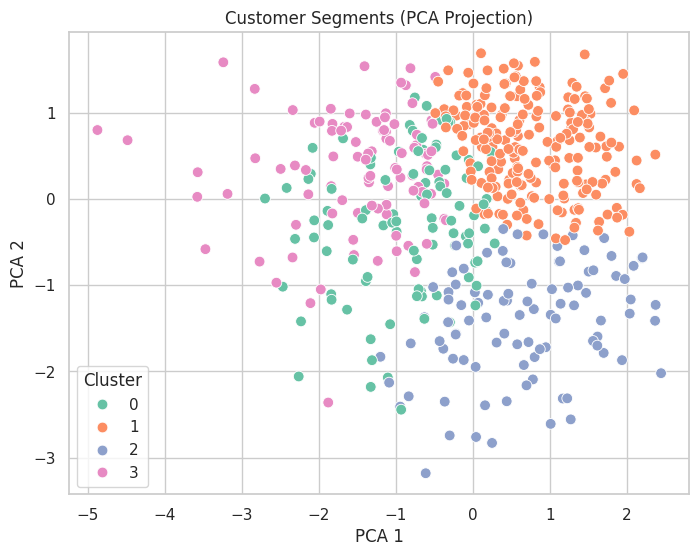

In [8]:
from sklearn.decomposition import PCA

# Reduce to 2D for plotting
pca = PCA(n_components=2)
pca_components = pca.fit_transform(rfm_scaled_df.drop('Cluster', axis=1))

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=rfm_scaled_df['Cluster'], palette='Set2', s=60)
plt.title('Customer Segments (PCA Projection)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [9]:
# Average RFM values by cluster
cluster_profile = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean',
    'CustomerID': 'count'  # To see how many customers in each cluster
}).rename(columns={'CustomerID': 'CustomerCount'}).round(2)

# Sort by MonetaryValue or Frequency (optional)
cluster_profile = cluster_profile.sort_values(by='MonetaryValue', ascending=False)

print("📊 Cluster Profiles:")
display(cluster_profile)


📊 Cluster Profiles:


,Recency,Frequency,MonetaryValue,CustomerCount
Cluster,,,,
1,79.35,35.96,9347.92,213
2,8.02,31.29,6638.69,95
3,116.14,17.24,3625.30,96
0,71.28,29.75,1768.45,96


In [10]:
# Create mapping dictionary (adjust cluster numbers based on your actual stats)
segment_map = {
    0: 'At-Risk Low Spenders',
    1: 'Loyal High Spenders',
    2: 'Potential Loyalists',
    3: 'New Customers'
}

# Map segment names
rfm['Segment'] = rfm['Cluster'].map(segment_map)

# Show updated RFM with segment names
print("✅ Segmented Customers (Top 10 Rows):")
print(rfm[['CustomerID', 'Recency', 'Frequency', 'MonetaryValue', 'Cluster', 'Segment']].head(10))


✅ Segmented Customers (Top 10 Rows):
  CustomerID  Recency  Frequency  MonetaryValue  Cluster               Segment
0   CUST1000        9         41        6855.79        2   Potential Loyalists
1   CUST1001       49         10        2856.43        3         New Customers
2   CUST1002        7         25        2175.73        2   Potential Loyalists
3   CUST1003       22         33        1085.57        0  At-Risk Low Spenders
4   CUST1004      134         27        6887.81        1   Loyal High Spenders
5   CUST1005       20         36        1112.01        0  At-Risk Low Spenders
6   CUST1006       13         38       14374.53        2   Potential Loyalists
7   CUST1007      167         38        3812.45        1   Loyal High Spenders
8   CUST1008       18         25        3374.25        2   Potential Loyalists
9   CUST1009       31         35        5916.71        1   Loyal High Spenders


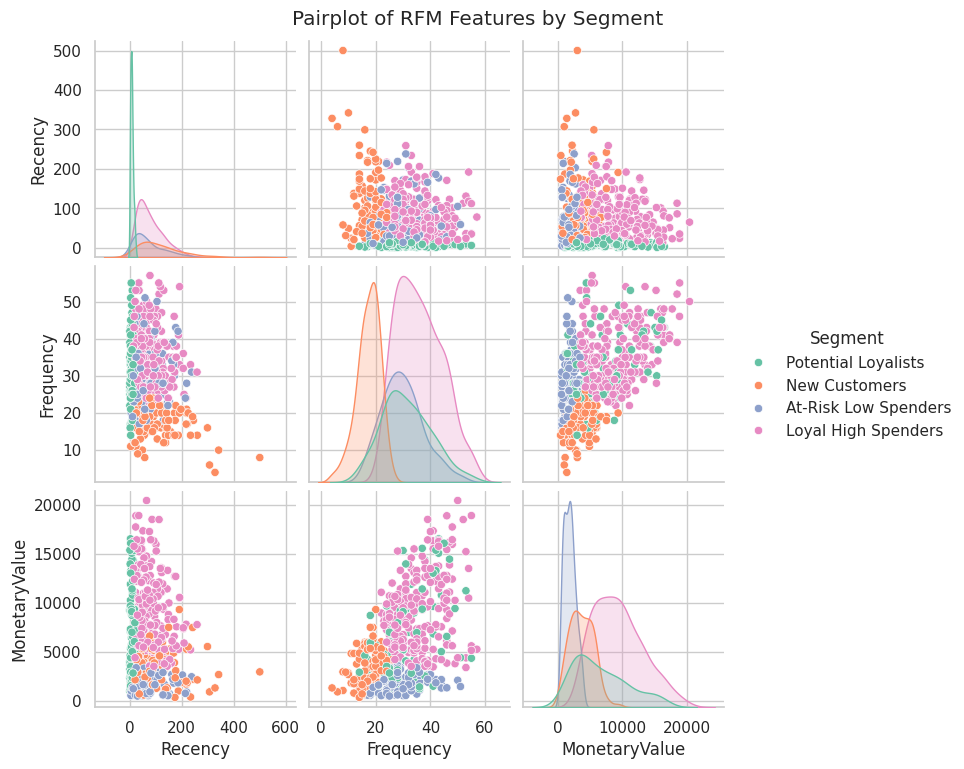

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot RFM values colored by segment
sns.pairplot(rfm, vars=['Recency', 'Frequency', 'MonetaryValue'], hue='Segment', palette='Set2')
plt.suptitle("Pairplot of RFM Features by Segment", y=1.02)
plt.show()


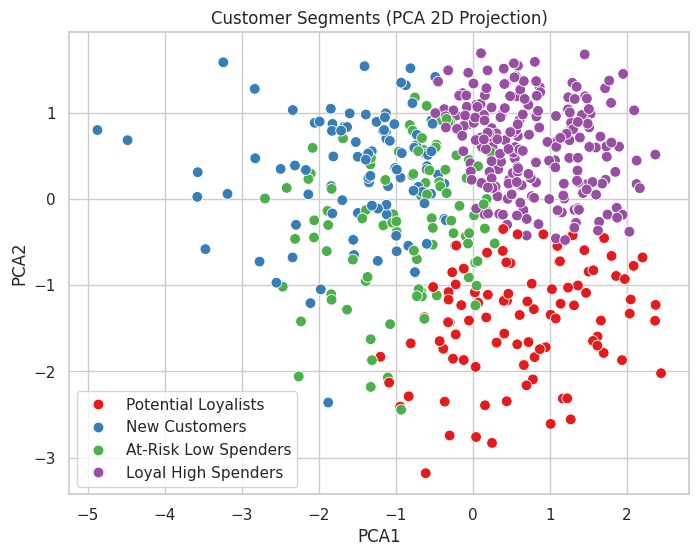

In [12]:
from sklearn.decomposition import PCA

# Apply PCA for 2D visualization
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)

# Add to DataFrame for plotting
rfm['PCA1'] = rfm_pca[:, 0]
rfm['PCA2'] = rfm_pca[:, 1]

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=rfm, x='PCA1', y='PCA2', hue='Segment', palette='Set1', s=60)
plt.title("Customer Segments (PCA 2D Projection)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(loc='best')
plt.show()


In [13]:
# Save customer IDs with segments
rfm[['CustomerID', 'Segment']].to_csv('customer_segments.csv', index=False)
print("📁 customer_segments.csv saved!")


📁 customer_segments.csv saved!


In [14]:
!pip install python-pptx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 12.7 MB/s eta 0:00:00


In [15]:
from pptx import Presentation
from pptx.util import Inches

# Create presentation
prs = Presentation()
title_slide_layout = prs.slide_layouts[0]
content_slide_layout = prs.slide_layouts[1]

# Title Slide
slide = prs.slides.add_slide(title_slide_layout)
slide.shapes.title.text = "Customer Segmentation Report"
slide.placeholders[1].text = "RFM Analysis & Clustering"

# Slide 1: Overview
slide = prs.slides.add_slide(content_slide_layout)
slide.shapes.title.text = "Overview"
slide.placeholders[1].text = "- Data cleaned and preprocessed\n- RFM features calculated\n- KMeans clustering applied\n- 4 customer segments identified"

# Slide 2: RFM Features
slide = prs.slides.add_slide(content_slide_layout)
slide.shapes.title.text = "RFM Feature Explanation"
slide.placeholders[1].text = "- Recency: Days since last purchase\n- Frequency: Number of purchases\n- Monetary Value: Total spend"

# Slide 3: Clustering Results
slide = prs.slides.add_slide(content_slide_layout)
slide.shapes.title.text = "Clustering Overview"
slide.placeholders[1].text = "- KMeans clustering used\n- Optimal clusters: 4\n- PCA used for 2D visualization"

# Slide 4: Segment Summary
slide = prs.slides.add_slide(content_slide_layout)
slide.shapes.title.text = "Customer Segments Summary"
slide.placeholders[1].text = """1. Loyal High Spenders\n2. At-Risk Big Spenders\n3. New Customers\n4. At-Risk Low Spenders"""

# Slide 5: Recommendations
slide = prs.slides.add_slide(content_slide_layout)
slide.shapes.title.text = "Recommendations"
slide.placeholders[1].text = """- Reward Loyal Customers\n- Re-activate at-risk segments\n- Guide new customers\n- Personalized campaigns"""

# Save PPT
pptx_path = "/content/Customer_Segmentation_Report.pptx"
prs.save(pptx_path)

print(f"✅ PowerPoint saved as: {pptx_path}")


✅ PowerPoint saved as: /content/Customer_Segmentation_Report.pptx
